<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관 분석 과제
1. 먼저 가상의 데이터를 생성해보겠습니다. 이 데이터는 1학년부터 3학년까지의 학생들의 수학, 영어, 국
어 점수를 나타내며, 각 학년당 100명씩의 학생이 있다고 가정합니다

2. CSV 파일로 저장 ex ) student_scores.csv

In [82]:
import numpy as np
import pandas as pd
import random
import os

student =[] 
for grade in range(1,4) :
  for i in range(0,100) :
    Grade = {
          'Grade' : grade,
          'Math': np.clip(int(np.random.normal(loc=50, scale=10)),0,100), 
          'Eng': np.clip(int(np.random.normal(loc=50, scale=10)),0,100), 
          'Kor': np.clip(int(np.random.normal(loc=50, scale=10)),0,100)
          }
    student.append(Grade)

student_score = pd.DataFrame(student)

print(student_score)

os.makedirs('./data', exist_ok = True)
student_score.to_csv("./data/student_score.csv", index=False)

     Grade  Math  Eng  Kor
0        1    59   53   43
1        1    48   55   38
2        1    69   55   35
3        1    64   42   67
4        1    45   28   47
..     ...   ...  ...  ...
295      3    41   43   53
296      3    46   54   37
297      3    56   69   57
298      3    47   46   55
299      3    41   44   34

[300 rows x 4 columns]


3. 상관 관계 분석 – 히트맵 출력

     Grade  Math  Eng  Kor
0        1    59   53   43
1        1    48   55   38
2        1    69   55   35
3        1    64   42   67
4        1    45   28   47
..     ...   ...  ...  ...
295      3    41   43   53
296      3    46   54   37
297      3    56   69   57
298      3    47   46   55
299      3    41   44   34

[300 rows x 4 columns]


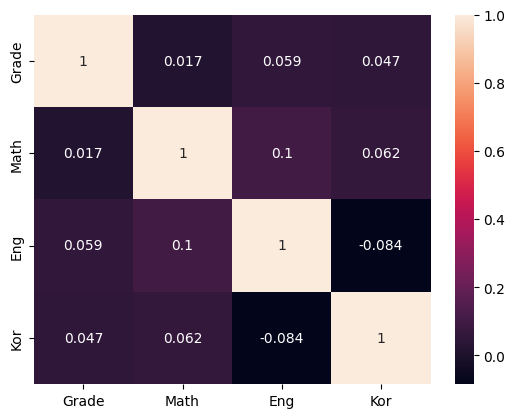

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

student_score = pd.read_csv("./data/student_score.csv")
print(student_score)
sns.heatmap(student_score.corr(), annot=True)
plt.show()

4. 과목별로 성적 분포와 통계치를 분석 판다스의 describe() 함수를 사용

In [55]:
print(student_score.describe())

       Unnamed: 0       Grade        Math         Eng         Kor
count  300.000000  300.000000  300.000000  300.000000  300.000000
mean   149.500000    2.000000   49.393333   49.403333   48.863333
std     86.746758    0.817861   10.065602   10.475037   10.273093
min      0.000000    1.000000   10.000000   23.000000   21.000000
25%     74.750000    1.000000   43.750000   42.000000   43.000000
50%    149.500000    2.000000   50.000000   49.000000   49.000000
75%    224.250000    3.000000   55.000000   57.250000   56.000000
max    299.000000    3.000000   75.000000   79.000000   75.000000


5. 과목별로 성적 분포와 통계치를 분석 시각화

(array([ 3.,  7., 19., 45., 63., 80., 45., 32.,  4.,  2.]),
 array([18. , 24.2, 30.4, 36.6, 42.8, 49. , 55.2, 61.4, 67.6, 73.8, 80. ]),
 <BarContainer object of 10 artists>)

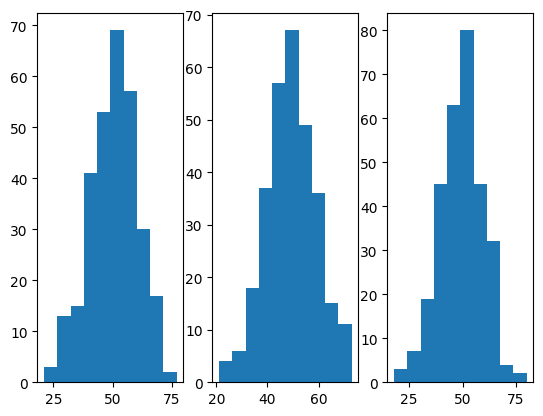

In [91]:
plt.subplot(1,3,1)
plt.hist(student_score['Math'], label = 'Math')

plt.subplot(1,3,2)
plt.hist(student_score['Eng'], label = 'Eng')

plt.subplot(1,3,3)
plt.hist(student_score['Kor'], label = 'Kor')

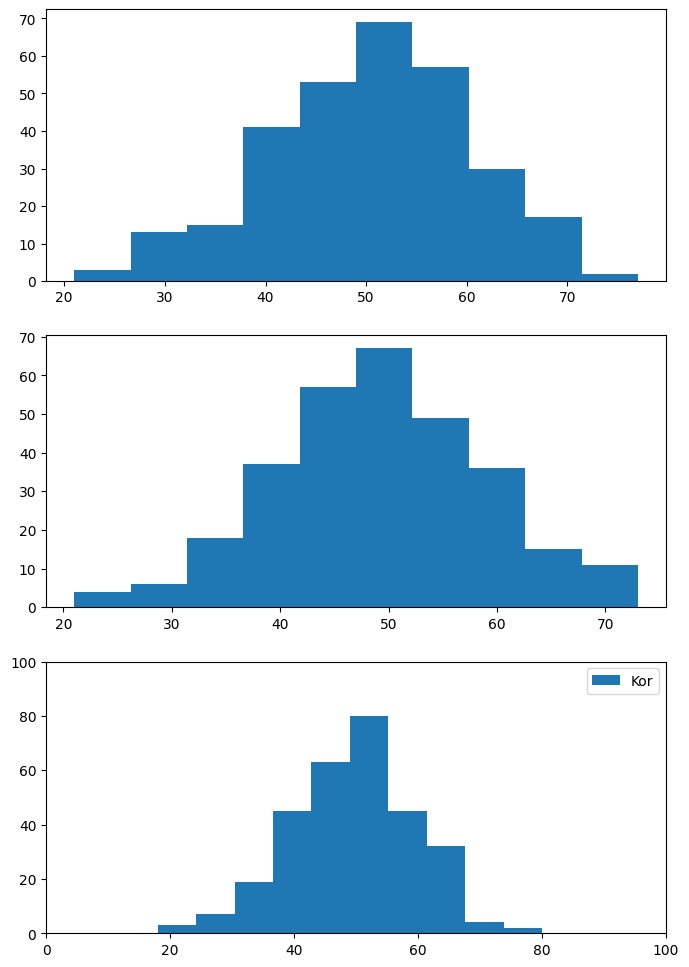

In [115]:
fig, axes = plt.subplots(3,1, figsize=(8,12))

axes[0].hist(student_score['Math'], label = 'Math')
plt.axis([0,100,0,100])
axes[1].hist(student_score['Eng'], label = 'Eng')
plt.axis([0,100,0,100])
axes[2].hist(student_score['Kor'], label = 'Kor')
plt.axis([0,100,0,100])

plt.legend()
plt.show()